Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set()

In [3]:
vaccine=pd.read_csv('training_set_features.csv')

In [4]:
test=pd.read_csv('test_set_features.csv')

In [5]:
vaccine.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


<Axes: >

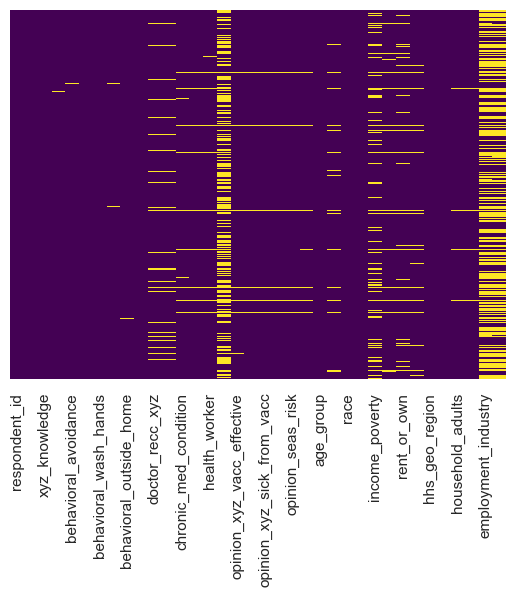

In [6]:
sns.heatmap(vaccine.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
vaccine.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [8]:
vaccine.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [9]:
vaccine.drop('employment_occupation',axis=1,inplace=True)

In [10]:
test.drop('employment_occupation',axis=1,inplace=True)

In [11]:
vaccine.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf


In [12]:
vaccine.drop('employment_industry',axis=1,inplace=True)

In [13]:
test.drop('employment_industry',axis=1,inplace=True)

In [14]:
vaccine.head(1)

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0


In [15]:
vaccine['health_insurance']=vaccine['health_insurance'].fillna(vaccine.health_insurance.mean())

In [16]:
test['health_insurance']=test['health_insurance'].fillna(test.health_insurance.mean())

In [17]:
colszero=['chronic_med_condition',
'child_under_6_months',
'health_worker',                  
'health_insurance']

In [18]:
vaccine[colszero]=vaccine[colszero].fillna(0)

In [19]:
test[colszero]=test[colszero].fillna(0)

In [20]:
vaccine.isna().sum()

respondent_id                     0
xyz_concern                      92
xyz_knowledge                   116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
health_insurance                  0
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status              

In [21]:
mode_val=vaccine['xyz_concern'].mode()[0]
mode_val

2.0

In [22]:
vaccine['xyz_concern']=vaccine['xyz_concern'].fillna(mode_val).infer_objects(copy=False)

In [23]:
test['xyz_concern']=test['xyz_concern'].fillna(mode_val).infer_objects(copy=False)

In [24]:
vaccine['xyz_concern'].isna().sum()

0

In [25]:
mode_filling=['xyz_knowledge','behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face','doctor_recc_xyz','doctor_recc_seasonal','opinion_xyz_vacc_effective','opinion_xyz_risk','opinion_xyz_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc']

In [26]:
mode_values=vaccine[mode_filling].mode().iloc[0]

In [27]:
vaccine[mode_filling]=vaccine[mode_filling].fillna(mode_values).infer_objects(copy=False)

In [28]:
test[mode_filling]=test[mode_filling].fillna(mode_values).infer_objects(copy=False)

In [29]:
vaccine.isna().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_xyz                   0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
health_insurance                  0
opinion_xyz_vacc_effective        0
opinion_xyz_risk                  0
opinion_xyz_sick_from_vacc        0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status              

In [30]:
vaccine.education.unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [31]:
# Fill NA values with a new category 'Unknown'
vaccine['education'] = vaccine['education'].fillna('Unknown')




In [32]:
test['education'] = test['education'].fillna('Unknown')

In [33]:
vaccine['education'].isna().sum()

0

In [34]:
vaccine.income_poverty.value_counts()

income_poverty
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64

In [35]:
mode=vaccine.income_poverty.mode()[0]

In [36]:
vaccine.income_poverty=vaccine.income_poverty.fillna(mode).infer_objects(copy=False)

In [37]:
test.income_poverty=test.income_poverty.fillna(mode).infer_objects(copy=False)

In [38]:
vaccine.income_poverty.isna().sum()

0

In [39]:
vaccine.marital_status.value_counts()

marital_status
Married        13555
Not Married    11744
Name: count, dtype: int64

In [40]:
vaccine.marital_status.isna().sum()

1408

In [41]:
vaccine.rent_or_own.value_counts()

rent_or_own
Own     18736
Rent     5929
Name: count, dtype: int64

In [42]:
# Fill NA values with a new category
vaccine['marital_status'] = vaccine['marital_status'].fillna('Married').infer_objects(copy=False)




In [43]:
test['marital_status'] = test['marital_status'].fillna('Married').infer_objects(copy=False)

In [44]:
vaccine.rent_or_own=vaccine.rent_or_own.fillna('Own').infer_objects(copy=False)

In [45]:
test.rent_or_own=test.rent_or_own.fillna('Own').infer_objects(copy=False)

In [46]:
vaccine.employment_status.unique()

array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

In [47]:
dum=pd.get_dummies(vaccine['employment_status'],drop_first=True)
vaccine=pd.concat([vaccine,dum],axis=1)
vaccine.drop('employment_status',axis=1,inplace=True)

In [48]:
dumt=pd.get_dummies(test['employment_status'],drop_first=True)
test=pd.concat([test,dumt],axis=1)
test.drop('employment_status',axis=1,inplace=True)

In [49]:
vaccine.household_adults.value_counts()

household_adults
1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: count, dtype: int64

In [50]:
vaccine.household_adults=vaccine.household_adults.fillna(1.0).infer_objects(copy=False)

In [51]:
test.household_adults=test.household_adults.fillna(1.0).infer_objects(copy=False)

In [52]:
vaccine.household_children.value_counts()

household_children
0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: count, dtype: int64

In [53]:
vaccine.household_children=vaccine.household_children.fillna(0.0).infer_objects(copy=False)

In [54]:
test.household_children=test.household_children.fillna(0.0).infer_objects(copy=False)

In [55]:
vaccine.isna().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
hhs_geo_region                 0
census_msa

In [56]:
mp3={'Own':1,'Rent':2}
vaccine.rent_or_own=vaccine.rent_or_own.map(mp3)

In [57]:
test.rent_or_own=test.rent_or_own.map(mp3)

In [58]:
mp2={'Not Married':0,'Married':1}
vaccine.marital_status=vaccine.marital_status.map(mp2)

In [59]:
test.marital_status=test.marital_status.map(mp2)

In [60]:
mp1={'Below Poverty':1, '<= $75,000, Above Poverty':2, '> $75,000':3}
vaccine.income_poverty=vaccine.income_poverty.map(mp1)

In [61]:
test.income_poverty=test.income_poverty.map(mp1)

In [62]:
mp={'Unknown':0,'< 12 Years':1, '12 Years':2, 'College Graduate':3, 'Some College':4}
vaccine.education=vaccine.education.map(mp)

In [63]:
test.education=test.education.map(mp)

In [64]:
vaccine.age_group.value_counts()

age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64

In [65]:
map={'18 - 34 Years': 1,'35 - 44 Years': 2,'45 - 54 Years':3,'55 - 64 Years':4,'65+ Years':5}

In [66]:
vaccine.age_group=vaccine.age_group.map(map)

In [67]:
test.age_group=test.age_group.map(map)

In [68]:
vaccine.age_group.head(2)

0    4
1    2
Name: age_group, dtype: int64

In [69]:
vaccine.race.unique()

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

In [70]:
ohe1=['White', 'Black', 'Other or Multiple', 'Hispanic']

In [71]:
for i in ohe1:
    vaccine[i]=np.where(vaccine['race']==i,1,0)
    test[i]=np.where(test['race']==i,1,0)

In [72]:
vaccine.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region,census_msa,household_adults,household_children,Not in Labor Force,Unemployed,White,Black,Other or Multiple,Hispanic
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,oxchjgsf,Non-MSA,0.0,0.0,True,False,1,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,bhuqouqj,"MSA, Not Principle City",0.0,0.0,False,False,1,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,qufhixun,"MSA, Not Principle City",2.0,0.0,False,False,1,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,lrircsnp,"MSA, Principle City",0.0,0.0,True,False,1,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,qufhixun,"MSA, Not Principle City",1.0,0.0,False,False,1,0,0,0


In [73]:
vaccine.drop('race',axis=1,inplace=True)

In [74]:
test.drop('race',axis=1,inplace=True)

In [75]:
vaccine.sex.value_counts()

sex
Female    15858
Male      10849
Name: count, dtype: int64

In [76]:
Sex_converted_variable=pd.get_dummies(vaccine['sex'],drop_first=True)

In [77]:
conv=pd.get_dummies(test['sex'],drop_first=True)

In [78]:
Sex_converted_variable

,Male
0,False
1,True
2,True
3,False
4,False
...,...
26702,False
26703,True
26704,False
26705,False


In [79]:
vaccine=pd.concat([vaccine,Sex_converted_variable],axis=1)

In [80]:
test=pd.concat([test,conv],axis=1)

In [81]:

vaccine.drop('sex',axis=1,inplace=True)
vaccine.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,census_msa,household_adults,household_children,Not in Labor Force,Unemployed,White,Black,Other or Multiple,Hispanic,Male
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Non-MSA,0.0,0.0,True,False,1,0,0,0,False
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,"MSA, Not Principle City",0.0,0.0,False,False,1,0,0,0,True
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"MSA, Not Principle City",2.0,0.0,False,False,1,0,0,0,True
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,"MSA, Principle City",0.0,0.0,True,False,1,0,0,0,False
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"MSA, Not Principle City",1.0,0.0,False,False,1,0,0,0,False


In [82]:
test.drop('sex',axis=1,inplace=True)

In [83]:
vaccine.hhs_geo_region.unique()

array(['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca'],
      dtype=object)

In [84]:
geo=['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca']

In [85]:
for category in geo:
    vaccine[category]=np.where(vaccine['hhs_geo_region']==category,1,0)
vaccine.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,oxchjgsf,bhuqouqj,qufhixun,lrircsnp,atmpeygn,lzgpxyit,fpwskwrf,mlyzmhmf,dqpwygqj,kbazzjca
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [86]:
for cat in geo:
  test[cat]=np.where(test['hhs_geo_region']==cat,1,0)


In [87]:
vaccine.drop('hhs_geo_region',axis=1,inplace=True)

In [88]:
test.drop('hhs_geo_region',axis=1,inplace=True)

In [89]:
vaccine.census_msa.unique()

array(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype=object)

In [90]:
mpk={'Non-MSA':0, 'MSA, Not Principle  City':1, 'MSA, Principle City':2}

In [91]:
vaccine.census_msa=vaccine.census_msa.map(mpk)

In [92]:
test.census_msa=test.census_msa.map(mpk)

In [93]:
vaccine.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                        int64
education                        int64
income_poverty                   int64
marital_status           

In [94]:
vaccine.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'income_poverty', 'marital_status', 'rent_or_own',
       'census_msa', 'household_adults', 'household_children',
       'Not in Labor Force', 'Unemployed', 'White', 'Black',
       'Other or Multiple', 'Hispanic', 'Male', 'oxchjgsf', 'bhuqouqj',
       'qufhixun', 'lrircsnp', 'atmpeygn', 'lzgpxyit', 'fpwskwrf', 'mlyzmhmf',
       'dqpwygqj', 'kbazzjca'],
      dtype='object'

In [95]:
test.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'income_poverty', 'marital_status', 'rent_or_own',
       'census_msa', 'household_adults', 'household_children',
       'Not in Labor Force', 'Unemployed', 'White', 'Black',
       'Other or Multiple', 'Hispanic', 'Male', 'oxchjgsf', 'bhuqouqj',
       'qufhixun', 'lrircsnp', 'atmpeygn', 'lzgpxyit', 'fpwskwrf', 'mlyzmhmf',
       'dqpwygqj', 'kbazzjca'],
      dtype='object'

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [97]:
col_names=['xyz_concern','xyz_knowledge','opinion_xyz_vacc_effective','opinion_xyz_risk','opinion_xyz_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc','age_group','education','income_poverty','marital_status','rent_or_own','census_msa']

In [98]:
features=vaccine[col_names]

In [99]:
vaccine[col_names] = scaler.fit_transform(features.values)

In [100]:
test[col_names] = scaler.transform(test[col_names].values)

In [101]:
vaccine[col_names].head()

,xyz_concern,xyz_knowledge,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,income_poverty,marital_status,rent_or_own,census_msa
0,0.333333,0.0,0.5,0.00,0.25,0.25,0.00,0.25,0.75,0.25,0.0,0.0,0.0,0.0
1,1.000000,1.0,1.0,0.75,0.75,0.75,0.25,0.75,0.25,0.50,0.0,0.0,1.0,0.5
2,0.333333,0.5,0.5,0.00,0.00,0.75,0.00,0.25,0.00,0.75,0.5,0.0,0.0,0.5
3,0.333333,0.5,0.5,0.50,1.00,1.00,0.75,0.00,1.00,0.50,0.0,0.0,1.0,1.0
4,0.666667,0.5,0.5,0.50,0.25,0.50,0.00,0.75,0.50,1.00,0.5,1.0,0.0,0.5


In [102]:
vaccine.isna().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
income_poverty                 0
marital_status                 0
rent_or_own                    0
census_msa                     0
household_adults               0
household_children             0
Not in Lab

In [103]:
vaccine.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'income_poverty', 'marital_status', 'rent_or_own',
       'census_msa', 'household_adults', 'household_children',
       'Not in Labor Force', 'Unemployed', 'White', 'Black',
       'Other or Multiple', 'Hispanic', 'Male', 'oxchjgsf', 'bhuqouqj',
       'qufhixun', 'lrircsnp', 'atmpeygn', 'lzgpxyit', 'fpwskwrf', 'mlyzmhmf',
       'dqpwygqj', 'kbazzjca'],
      dtype='object'

In [104]:
test.isna().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
income_poverty                 0
marital_status                 0
rent_or_own                    0
census_msa                     0
household_adults               0
household_children             0
Not in Lab

In [105]:
test.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                      float64
education                      float64
income_poverty                 float64
marital_status           

In [106]:
vaccine_label=pd.read_csv('training_set_labels.csv')
vaccine_label.head(3)

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0


In [107]:
from sklearn.datasets import load_digits

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
x_vaccine=vaccine.drop('respondent_id',axis=1)

In [111]:
Y_xyz_vaccine=vaccine_label['xyz_vaccine']
Y_sea_vaccine=vaccine_label['seasonal_vaccine']

In [112]:
xyz_reg=LogisticRegression(max_iter=1000)
seasonal_reg=LogisticRegression(max_iter=1000)

In [113]:
xyz_reg.fit(x_vaccine,Y_xyz_vaccine)
seasonal_reg.fit(x_vaccine,Y_sea_vaccine)

LogisticRegression(max_iter=1000)

In [115]:
x_test=test.drop('respondent_id', axis=1, errors='ignore')
Y_xyz_vaccine=xyz_reg.predict_proba(x_test)[:, 1]
Y_sea_vaccine=seasonal_reg.predict_proba(x_test)[:, 1]

In [116]:
final = pd.DataFrame({
    'respondent_id': test['respondent_id'],
    'xyz_vaccine_label': Y_xyz_vaccine,
    'seasonal_vaccine_label': Y_sea_vaccine
})

In [117]:
final.to_csv('output.csv', index=False)

In [118]:
from sklearn.metrics import roc_auc_score

In [123]:
y_test_xyz = final['xyz_vaccine_label'] # True labels for XYZ vaccine
y_test_seasonal = final['seasonal_vaccine_label']  # True labels for seasonal vaccine

# Calculate ROC AUC scores
roc_auc_xyz = roc_auc_score(y_test_xyz, Y_xyz_vaccine)
roc_auc_seasonal = roc_auc_score(y_test_seasonal, Y_sea_vaccine)

ValueError: continuous format is not supported